<a href="https://colab.research.google.com/github/ellenwang995/week2_pandas/blob/main/Pandas_Plotly_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Public Policy — Session 2 Workbook

**Data Manipulation with pandas + Interactive Charts with Plotly Express**

## Lesson 1: Warm‑Up — Tiny DataFrame

In [85]:
import pandas as pd

toys = {
    'country': ['A', 'B', 'C'],
    'year': [2005, 2006, 2007],
    'arrivals': [10, 0, 5]
}

toy_df = pd.DataFrame(toys)
toy_df

,country,year,arrivals
0,A,2005,10
1,B,2006,0
2,C,2007,5


In [86]:
import pandas as pd

In [87]:
toys = {
    'country': ['A','B', 'C'],
    'year': [2005, 2006, 2007],
    'arrivals': [10, 0, 5]
}


In [88]:
toy_df = pd.DataFrame(toys)

In [89]:
toy_df

,country,year,arrivals
0,A,2005,10
1,B,2006,0
2,C,2007,5


**Try it**
- Show only the `country` and `arrivals` columns.
- Filter rows where `arrivals` > 0.
- Compute `pct_total` = arrivals / total * 100.

In [90]:
# Your code here
# toy_df[['country', 'arrivals']]
# toy_df[toy_df['arrivals'] > 0]
# toy_df['pct_total'] = toy_df['arrivals'] / toy_df['arrivals'].sum() * 100
# toy_df

## Lesson 2: Load the Refugee Arrivals Dataset

**Data citation**
- U.S. refugee arrivals (2005–2015), compiled from the Refugee Processing Center (via Jeremy Singer‑Vine).

In [91]:
import pandas as pd
url = 'https://raw.githubusercontent.com/GC-DRI/DRI24/main/uploads/pandas/refugee-arrivals-by-destination.csv'
refugee_df = pd.read_csv(url)
len(refugee_df), refugee_df.head(3)

(121245,
    year       origin dest_state dest_city  arrivals
 0  2005  Afghanistan    Alabama    Mobile         0
 1  2006  Afghanistan    Alabama    Mobile         0
 2  2007  Afghanistan    Alabama    Mobile         0)

In [92]:
import pandas as pd
url = 'https://raw.githubusercontent.com/GC-DRI/DRI24/main/uploads/pandas/refugee-arrivals-by-destination.csv'
refugee_df = pd.read_csv(url)
refugee_df.head(10)

,year,origin,dest_state,dest_city,arrivals
0,2005,Afghanistan,Alabama,Mobile,0
1,2006,Afghanistan,Alabama,Mobile,0
2,2007,Afghanistan,Alabama,Mobile,0
3,2008,Afghanistan,Alabama,Mobile,0
4,2009,Afghanistan,Alabama,Mobile,5
5,2010,Afghanistan,Alabama,Mobile,8
6,2011,Afghanistan,Alabama,Mobile,5
7,2012,Afghanistan,Alabama,Mobile,7
8,2013,Afghanistan,Alabama,Mobile,9
9,2014,Afghanistan,Alabama,Mobile,1


In [93]:
refugee_df.tail(10)

,year,origin,dest_state,dest_city,arrivals
121235,2006,Vietnam,Wisconsin,Milwaukee,5
121236,2007,Vietnam,Wisconsin,Milwaukee,18
121237,2008,Vietnam,Wisconsin,Milwaukee,12
121238,2009,Vietnam,Wisconsin,Milwaukee,4
121239,2010,Vietnam,Wisconsin,Milwaukee,7
121240,2011,Vietnam,Wisconsin,Milwaukee,0
121241,2012,Vietnam,Wisconsin,Milwaukee,4
121242,2013,Vietnam,Wisconsin,Milwaukee,2
121243,2014,Vietnam,Wisconsin,Milwaukee,0
121244,2015,Vietnam,Wisconsin,Milwaukee,0


In [94]:
refugee_df[300:400]

,year,origin,dest_state,dest_city,arrivals
300,2005,Iraq,Alabama,Foley,0
301,2006,Iraq,Alabama,Foley,0
302,2007,Iraq,Alabama,Foley,0
303,2008,Iraq,Alabama,Foley,0
304,2009,Iraq,Alabama,Foley,0
...,...,...,...,...,...
395,2012,Liberia,Alabama,Montgomery,0
396,2013,Liberia,Alabama,Montgomery,0
397,2014,Liberia,Alabama,Montgomery,0
398,2015,Liberia,Alabama,Montgomery,0


### Quick exploration

In [95]:
refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121245 entries, 0 to 121244
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        121245 non-null  int64 
 1   origin      121245 non-null  object
 2   dest_state  121245 non-null  object
 3   dest_city   121245 non-null  object
 4   arrivals    121245 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


In [96]:
refugee_df.sample(5)

,year,origin,dest_state,dest_city,arrivals
51593,2005,Belarus,Massachusetts,West Springfield,15
52761,2007,Eritrea,Massachusetts,Somerville,0
94395,2006,Liberia,Pennsylvania,Steelton,0
66342,2014,Iraq,Missouri,Chesterfield,2
25008,2007,Cuba,Florida,Cape Coral,9


In [97]:
refugee_df.sample(40)

,year,origin,dest_state,dest_city,arrivals
99611,2008,Sierra Leone,Tennessee,Nashville,0
86740,2007,Iraq,Ohio,Fairview Park,0
87976,2011,Somalia,Ohio,Galloway,0
34871,2014,Republic of South Sudan,Idaho,Twin Falls,0
95426,2014,Sudan,Pennsylvania,Scranton,3
10519,2005,Iran,California,Van Nuys,15
41039,2011,Iraq,Indiana,Muncie,0
79704,2011,Sudan,New York,Syracuse,20
40900,2015,Iran,Indiana,South Bend,0
20183,2011,Iraq,Colorado,Greenwood Village,0


**Try it**
- Show the last 7 rows.
- Show the first 10 unique origins.

In [98]:
# refugee_df.tail(7)
# refugee_df['origin'].unique()[:10]

## Lesson 3: Cleaning Basics

### Data types
Keep `year` as an integer for grouping. Add `year_dt` for date operations if needed.

In [99]:
refugee_df['year_dt'] = pd.to_datetime(refugee_df['year'], format='%Y')
refugee_df.dtypes

,0
year,int64
origin,object
dest_state,object
dest_city,object
arrivals,int64
year_dt,datetime64[ns]


In [100]:
refugee_df.dtypes

,0
year,int64
origin,object
dest_state,object
dest_city,object
arrivals,int64
year_dt,datetime64[ns]


In [101]:
refugee_df['yeardt'] = pd.to_datetime(refugee_df['year'], format = '%Y')

In [102]:
refugee_df['yeardt']

,yeardt
0,2005-01-01
1,2006-01-01
2,2007-01-01
3,2008-01-01
4,2009-01-01
...,...
121240,2011-01-01
121241,2012-01-01
121242,2013-01-01
121243,2014-01-01


In [103]:
refugee_df.dtypes

,0
year,int64
origin,object
dest_state,object
dest_city,object
arrivals,int64
year_dt,datetime64[ns]
yeardt,datetime64[ns]


### Duplicates

In [104]:
refugee_df[refugee_df.duplicated(keep=False)].sort_values(by=['year', 'origin'])

,year,origin,dest_state,dest_city,arrivals,year_dt,yeardt
158,2005,Cuba,Alabama,Theodore,0,2005-01-01,2005-01-01
163,2005,Cuba,Alabama,Theodore,0,2005-01-01,2005-01-01
240,2005,Iran,Alabama,Pelham,0,2005-01-01,2005-01-01
251,2005,Iran,Alabama,Pelham,0,2005-01-01,2005-01-01
159,2006,Cuba,Alabama,Theodore,0,2006-01-01,2006-01-01
164,2006,Cuba,Alabama,Theodore,0,2006-01-01,2006-01-01
13,2007,Burma,Alabama,Auburn,0,2007-01-01,2007-01-01
17,2007,Burma,Alabama,Auburn,0,2007-01-01,2007-01-01
14,2008,Burma,Alabama,Auburn,0,2008-01-01,2008-01-01
18,2008,Burma,Alabama,Auburn,0,2008-01-01,2008-01-01


In [105]:
refugee_df = refugee_df.drop_duplicates(keep='first')
refugee_df.shape

(121231, 7)

In [106]:
refugee_df[refugee_df.duplicated(keep = False)]

,year,origin,dest_state,dest_city,arrivals,year_dt,yeardt


### Renaming & Selecting

In [84]:
refugee_df.columns

Index(['year', 'origin', 'state', 'city', 'arrivals', 'year_dt', 'yeardt'], dtype='object')

In [111]:
refugee_df = refugee_df.rename(columns={'dest_state':'state', 'dest_city':'city'})
refugee_df.columns.tolist()

['year', 'origin', 'state', 'city', 'arrivals', 'year_dt', 'yeardt']

In [113]:
refugee_df[['state', 'city']]

,state,city
0,Alabama,Mobile
1,Alabama,Mobile
2,Alabama,Mobile
3,Alabama,Mobile
4,Alabama,Mobile
...,...,...
121240,Wisconsin,Milwaukee
121241,Wisconsin,Milwaukee
121242,Wisconsin,Milwaukee
121243,Wisconsin,Milwaukee


In [ ]:
state_only_df = refugee_df[['state']]
state_series = refugee_df['state']
state_only_df.head(2), type(state_only_df), type(state_series)

(     state
 0  Alabama
 1  Alabama,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

**Try it**
Using `.loc`, select rows where `origin == 'Iraq'` and columns `['year','state','city','arrivals']`. Then compute the mean of `arrivals`.

In [ ]:
# iraq = refugee_df.loc[refugee_df['origin']=='Iraq', ['year','state','city','arrivals']]
# iraq_mean = iraq['arrivals'].mean()
# iraq.head(3), iraq_mean

## Lesson 4: Grouping & Summarizing

In [125]:
arrival_top20 = refugee_df.groupby('origin')['arrivals'].sum().sort_values(ascending=False).head(20).to_frame().reset_index()
arrival_top20
#short version of what is done below

,origin,arrivals
0,Burma,151875
1,Iraq,127326
2,Bhutan,85316
3,Somalia,71120
4,Cuba,39946
5,Iran,36683
6,Dem. Rep. Congo,25493
7,Russia,15656
8,Eritrea,14645
9,Sudan,12636


In [ ]:
by_origin = refugee_df.groupby('origin')
arrivals_sum = by_origin['arrivals'].sum()
arrivals_sum_sorted = arrivals_sum.sort_values(ascending=False)
arrivals_top20 = arrivals_sum_sorted.head(20)
arrivals_top20

,arrivals
origin,
Burma,151875
Iraq,127326
Bhutan,85316
Somalia,71120
Cuba,39946
Iran,36683
Dem. Rep. Congo,25493
Russia,15656
Eritrea,14645


In [115]:
by_origin = refugee_df.groupby('origin')

In [116]:
arrival_sum = by_origin['arrivals'].sum()

In [117]:
arrival_sum

,arrivals
origin,
Afghanistan,6751
Albania,3
Algeria,6
Angola,54
Armenia,311
...,...
Venezuela,17
Vietnam,10769
Yemen,112


In [119]:
arrival_sum_sorted = arrival_sum.sort_values(ascending = False)

In [120]:
arrival_sum_sorted

,arrivals
origin,
Burma,151875
Iraq,127326
Bhutan,85316
Somalia,71120
Cuba,39946
...,...
Philippines,1
Sweden,1
United Kingdom,1


In [122]:
arrivals_top20 = arrival_sum_sorted.head(20)

In [123]:
arrivals_top20

,arrivals
origin,
Burma,151875
Iraq,127326
Bhutan,85316
Somalia,71120
Cuba,39946
Iran,36683
Dem. Rep. Congo,25493
Russia,15656
Eritrea,14645


In [126]:
#convert variables into a data frame
ref_sum_df = arrivals_top20.to_frame().reset_index()
ref_sum_df.head()

,origin,arrivals
0,Burma,151875
1,Iraq,127326
2,Bhutan,85316
3,Somalia,71120
4,Cuba,39946


**Try it**
Compute the top 10 states by total arrivals and save as `state_sum_df`.

In [ ]:
# state_sum_df = (refugee_df.groupby('state')['arrivals']
#                                .sum()
#                                .sort_values(ascending=False)
#                                .head(10)
#                                .to_frame()
#                                .reset_index())
# state_sum_df

## Lesson 5: Quick Visuals with pandas `.plot()`

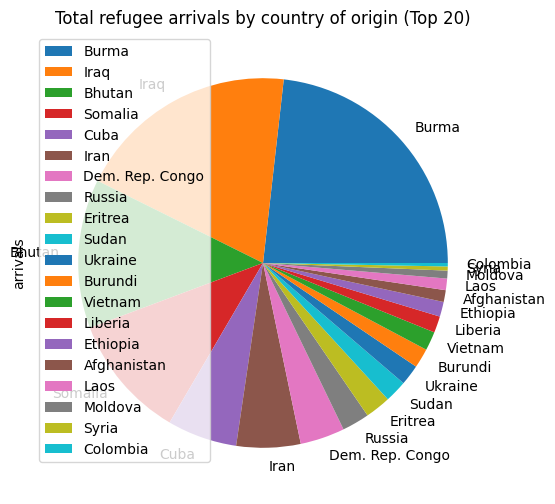

In [129]:
ax = ref_sum_df.plot(kind='pie', y='arrivals', figsize=(12,6),
                      title='Total refugee arrivals by country of origin (Top 20)', labels=ref_sum_df['origin'])

**Try it**
Make a line chart of total arrivals by year.

In [ ]:
# total_by_year = refugee_df.groupby('year')['arrivals'].sum()
# ax = total_by_year.plot(kind='line', figsize=(10,5), title='Total arrivals by year')

## Lesson 6: Interactive Charts with Plotly Express

In [130]:
# !pip -q install plotly
import plotly.express as px

### Bar chart (interactive)

In [131]:
origin_sum = (refugee_df.groupby('origin')['arrivals']
               .sum().sort_values(ascending=False).head(15).reset_index())
#groups data by origin and sums the arrival, taking the top 15 countries with the highest amount of arrivals -> resets index but does not put the data back into a data frame
fig = px.bar(origin_sum, x='origin', y='arrivals',
             title='Total refugee arrivals by origin (Top 15)')
fig.show()

### Line chart (interactive)

In [ ]:
total_by_year = refugee_df.groupby('year')['arrivals'].sum().reset_index()
fig = px.line(total_by_year, x='year', y='arrivals', markers=True,
              title='Total refugee arrivals by year (2005–2015)')
fig.show()

### Scatter with faceting

In [ ]:
focus = refugee_df[refugee_df['origin'].isin(['Iraq','Somalia','Bhutan','Burma','Iran'])]
by_pair = focus.groupby(['origin','year'])['arrivals'].sum().reset_index()
fig = px.scatter(by_pair, x='year', y='arrivals', color='origin',
                 facet_col='origin', facet_col_wrap=3,
                 title='Yearly arrivals for selected origins')
fig.show()

## Save Artifacts (CSV)

In [ ]:
refugee_df.to_csv('refugee_clean.csv', index=False)
try:
    from google.colab import files
    files.download('refugee_clean.csv')
except Exception:
    print('File saved to working directory.')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
End of Workbook.